In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from cdt.data import CausalPairGenerator
from cdt.causality.pairwise import CDS

Detecting 1 CUDA device(s).


# Generate pairs

In [3]:
generator = CausalPairGenerator("polynomial")
data, labels = generator.generate(1000, 400)

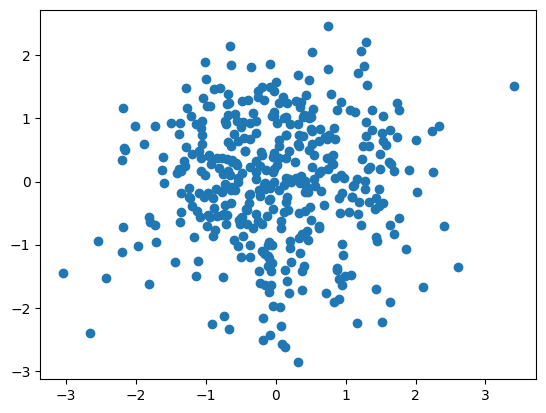

In [4]:
plt.scatter(data.iloc[0]["A"], data.iloc[0]["B"])

In [5]:
labels

,label
0,-1
1,-1
2,1
3,1
4,-1
...,...
995,1
996,1
997,-1
998,1


In [6]:
data

,A,B
0,"[1.1927244588652903, -0.09182500633604809, -0....","[-0.3289179564192724, -0.29865421918711704, 0...."
1,"[1.3913397602279214, 1.9156884857683072, 0.826...","[1.5884348506153942, 1.5371645388341728, 1.909..."
2,"[-0.4572880549562266, -1.126317832915339, 0.03...","[1.066248006174198, 0.659336169657017, -1.5901..."
3,"[3.177129588591319, 2.8020090864737788, -0.473...","[0.9981199267773341, -0.06100997124537864, 1.5..."
4,"[-0.7313702930710294, -0.8630393840628174, -0....","[1.078939315150831, 0.5812563383286359, 1.0543..."
...,...,...
995,"[0.3080115644184118, -0.432875242049212, 0.952...","[0.16624848283161367, -0.6125524478786087, 1.0..."
996,"[-0.7830714708817764, -0.3108113894000379, 0.2...","[0.4165665926396466, 0.5207756654933736, 0.500..."
997,"[0.3645979521877177, -0.529354302952431, -0.38...","[0.11259325167968803, -1.3476355048281725, -1...."
998,"[-0.34623479144610225, -1.389528308029486, 0.6...","[0.6197895391923759, 0.5201817689004439, -0.31..."


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [8]:
from cdt.causality.pairwise import CDS, ANM, BivariateFit, IGCI

In [9]:
simple_methods = [CDS(), BivariateFit(), IGCI()]

In [10]:
for method in simple_methods:
    preds = np.array(method.predict(X_test))
    # apply sign to the predictions
    preds = np.sign(preds)
    # compute the accuracy
    acc = accuracy_score(y_test, preds)
    print("Accuracy of {} on test data: {}".format(method.__class__.__name__, acc))

Accuracy of CDS on test data: 0.7166666666666667
Accuracy of BivariateFit on test data: 0.6166666666666667
Accuracy of IGCI on test data: 0.3333333333333333


In [11]:
from cdt.causality.pairwise import CDS, ANM, BivariateFit, IGCI
from cdt.causality.pairwise import Jarfo
jarfo = Jarfo()
jarfo.fit(X_train, y_train)
preds = np.sign(jarfo.predict(X_test))
acc = accuracy_score(y_test, preds)
print("Accuracy of {} on test data: {}".format(jarfo.__class__.__name__, acc))

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

Reading in training data --ip=127.0.0.1
Extracting features
Training model with optimal weights


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

Accuracy of Jarfo on test data: 0.5666666666666667


In [12]:
from cdt.causality.pairwise import NCC

ncc = NCC()
ncc.fit(X_train, y_train)
preds = np.sign(ncc.predict(X_test))
acc = accuracy_score(y_test, preds)
print("Accuracy of {} on test data: {}".format(ncc.__class__.__name__, acc))

100%|█████████▉| 299/300 [00:00<00:00, 1830.70it/s]

Accuracy of NCC on test data: 0.86


In [14]:
data.to_csv("generated_data/datasets/pairs_poly.csv")

In [15]:
labels.to_csv("generated_data/ground_truths/pairs_poly_labels.csv")

### Different split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=69)

In [18]:
for method in simple_methods:
    preds = np.array(method.predict(X_test))
    # apply sign to the predictions
    preds = np.sign(preds)
    # compute the accuracy
    acc = accuracy_score(y_test, preds)
    print("Accuracy of {} on test data: {}".format(method.__class__.__name__, acc))

Accuracy of CDS on test data: 0.6866666666666666
Accuracy of BivariateFit on test data: 0.63
Accuracy of IGCI on test data: 0.34


In [19]:
from cdt.causality.pairwise import NCC

ncc = NCC()
ncc.fit(X_train, y_train)
preds = np.sign(ncc.predict(X_test))
acc = accuracy_score(y_test, preds)
print("Accuracy of {} on test data: {}".format(ncc.__class__.__name__, acc))

100%|█████████▉| 299/300 [00:00<00:00, 1864.83it/s]

Accuracy of NCC on test data: 0.8033333333333333
